In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import timedelta
from matplotlib.ticker import MultipleLocator, FuncFormatter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
merged_n = pd.read_csv(r'/content/drive/MyDrive/Dissertation_10862121/merged_n.csv')
merged_d = pd.read_csv(r'/content/drive/MyDrive/Dissertation_10862121/merged_d.csv')

In [ ]:
merged_n['GMT'] = pd.to_datetime(merged_n['GMT'])
merged_n['Date'] = pd.to_datetime(merged_n['Date'])
merged_n.set_index('GMT', inplace=True)

In [ ]:
merged_d['GMT'] = pd.to_datetime(merged_d['GMT'])
merged_d['Date'] = pd.to_datetime(merged_d['Date'])
merged_d.set_index('GMT', inplace=True)

In [ ]:
merged_n['Consumption Per Household'] = merged_n['Total Household Consumption (N)'] / 4173
merged_d['Consumption Per Household'] = merged_d['Total Household Consumption (D)'] / 1025

In [ ]:
merged_n.describe()

Total Household Consumption (N)    Year        Month          Day  \
count                      8760.000000  8760.0  8760.000000  8760.000000   
mean                       1741.908178  2013.0     6.526027    15.720548   
std                         624.741720     0.0     3.448048     8.796749   
min                         799.946338  2013.0     1.000000     1.000000   
25%                        1261.526631  2013.0     4.000000     8.000000   
50%                        1670.779844  2013.0     7.000000    16.000000   
75%                        2098.414616  2013.0    10.000000    23.000000   
max                        3970.438521  2013.0    12.000000    31.000000   

              Hour    DayOfWeek  Hourly Global Radiation (KJ/m2)  \
count  8760.000000  8760.000000                      8760.000000   
mean     11.500000     2.994521                       419.198421   
std       6.922582     2.000107                       696.209054   
min       0.000000     0.000000                         0.000000   
25%       5.750000     1.000000                         0.000000   
50%      11.500000     3.000000                        16.333333   
75%      17.250000     5.000000                       569.500000   
max      23.000000     6.000000                      3290.333333   

       Hourly Maximum Gust (kn)  Hourly Mean Wind Direction (o)  \
count               8760.000000                     8760.000000   
mean                  13.623415                      188.438185   
std                    6.584945                       88.042196   
min                    2.000000                       16.000000   
25%                    8.600000                      102.000000   
50%                   12.800000                      212.000000   
75%                   17.400000                      254.000000   
max                   56.400000                      356.000000   

       Hourly Mean Windspeed (kn)  Hourly Pressure at Mean Sea Level (hPa)  \
count                 8760.000000                              8760.000000   
mean                     7.341098                              1015.188538   
std                      3.640448                                10.289586   
min                      0.800000                               976.500000   
25%                      4.600000                              1009.075000   
50%                      7.000000                              1015.750000   
75%                      9.400000                              1022.425000   
max                     27.200000                              1040.050000   

       Hourly Rainfall Total (mm)  Hourly Relative Humidity (%)  \
count                 8760.000000                   8760.000000   
mean                     0.080647                     76.964981   
std                      0.343273                     15.090821   
min                      0.000000                     21.971429   
25%                      0.000000                     67.557143   
50%                      0.000000                     80.169048   
75%                      0.000000                     89.357143   
max                      7.120000                     98.971429   

       Hourly Snow Depth (cm)  Hourly Temperature (C)  \
count             8760.000000             8760.000000   
mean                 0.052911               10.419904   
std                  0.451105                6.540530   
min                  0.000000               -4.428571   
25%                  0.000000                5.400000   
50%                  0.000000               10.114286   
75%                  0.000000               15.189286   
max                  6.500000               32.057143   

       Hourly Total Cloud Cover (oktas)\n  Hourly Visibility (dm)  \
count                         8760.000000             8760.000000   
mean                             5.100266             2421.355594   
std                              2.866701             1274.053187   
min     

EDA

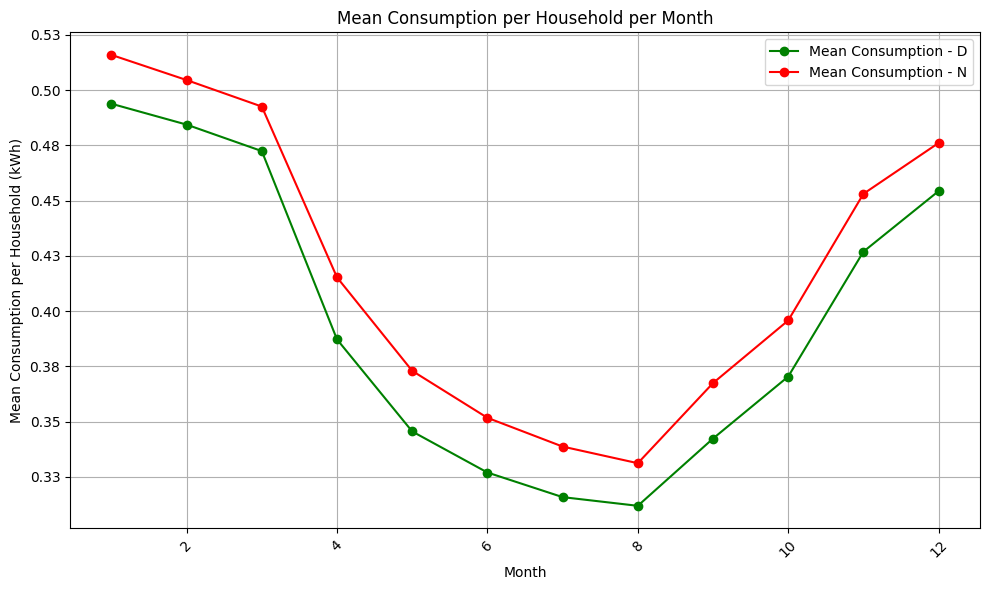

In [ ]:
# Calculating the mean household consumption by month for each dataframe
mean_consumption_d_month = merged_d.groupby('Month')['Consumption Per Household'].mean()
mean_consumption_n_month = merged_n.groupby('Month')['Consumption Per Household'].mean()

# Creating plots to compare the mean household consumption for both dataframes
plt.figure(figsize=(10, 6))
plt.plot(mean_consumption_d_month.index, mean_consumption_d_month, label='Mean Consumption - D', marker='o', color = 'green')
plt.plot(mean_consumption_n_month.index, mean_consumption_n_month, label='Mean Consumption - N', marker='o', color = 'red')

y_formatter = FuncFormatter(lambda x, p: format(float(x), '.2f'))
plt.gca().yaxis.set_major_formatter(y_formatter)

plt.xlabel('Month')
plt.ylabel('Mean Consumption per Household (kWh)')
plt.title('Mean Consumption per Household per Month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Daily Time-Series

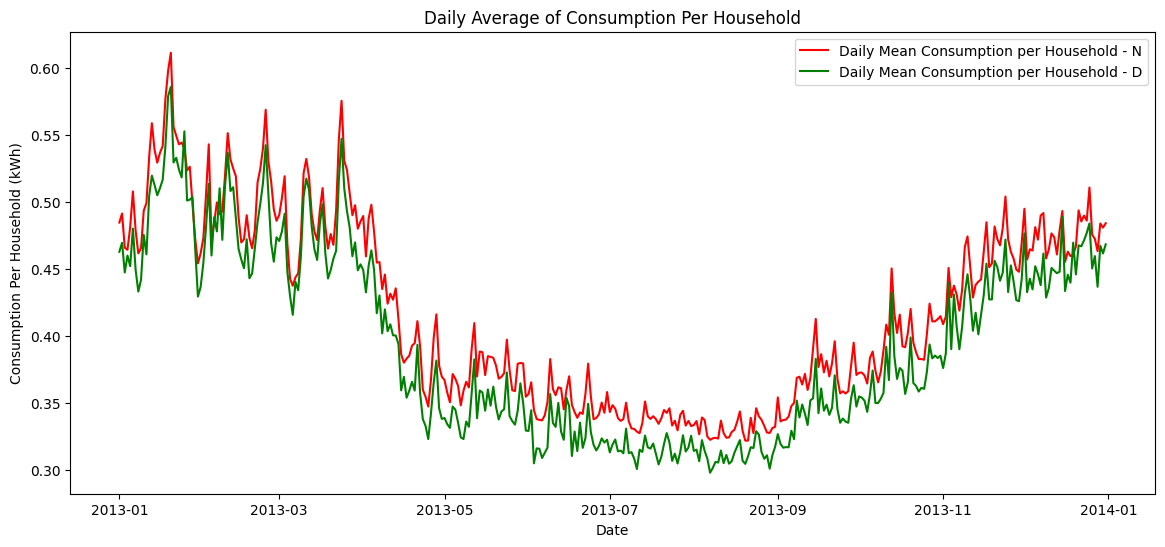

In [ ]:
daily_avg_n = merged_n['Consumption Per Household'].resample('D').mean()
daily_avg_d = merged_d['Consumption Per Household'].resample('D').mean()

plt.figure(figsize=(14,6))
plt.plot(daily_avg_n.index, daily_avg_n,label='Daily Mean Consumption per Household - N', color='red')
plt.plot(daily_avg_d.index, daily_avg_d,label='Daily Mean Consumption per Household - D', color='green')
plt.title('Daily Average of Consumption Per Household')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Consumption Per Household (kWh)')
plt.show()

<ipython-input-81-a505abc38648>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_n = filtered_merged_n.corr()


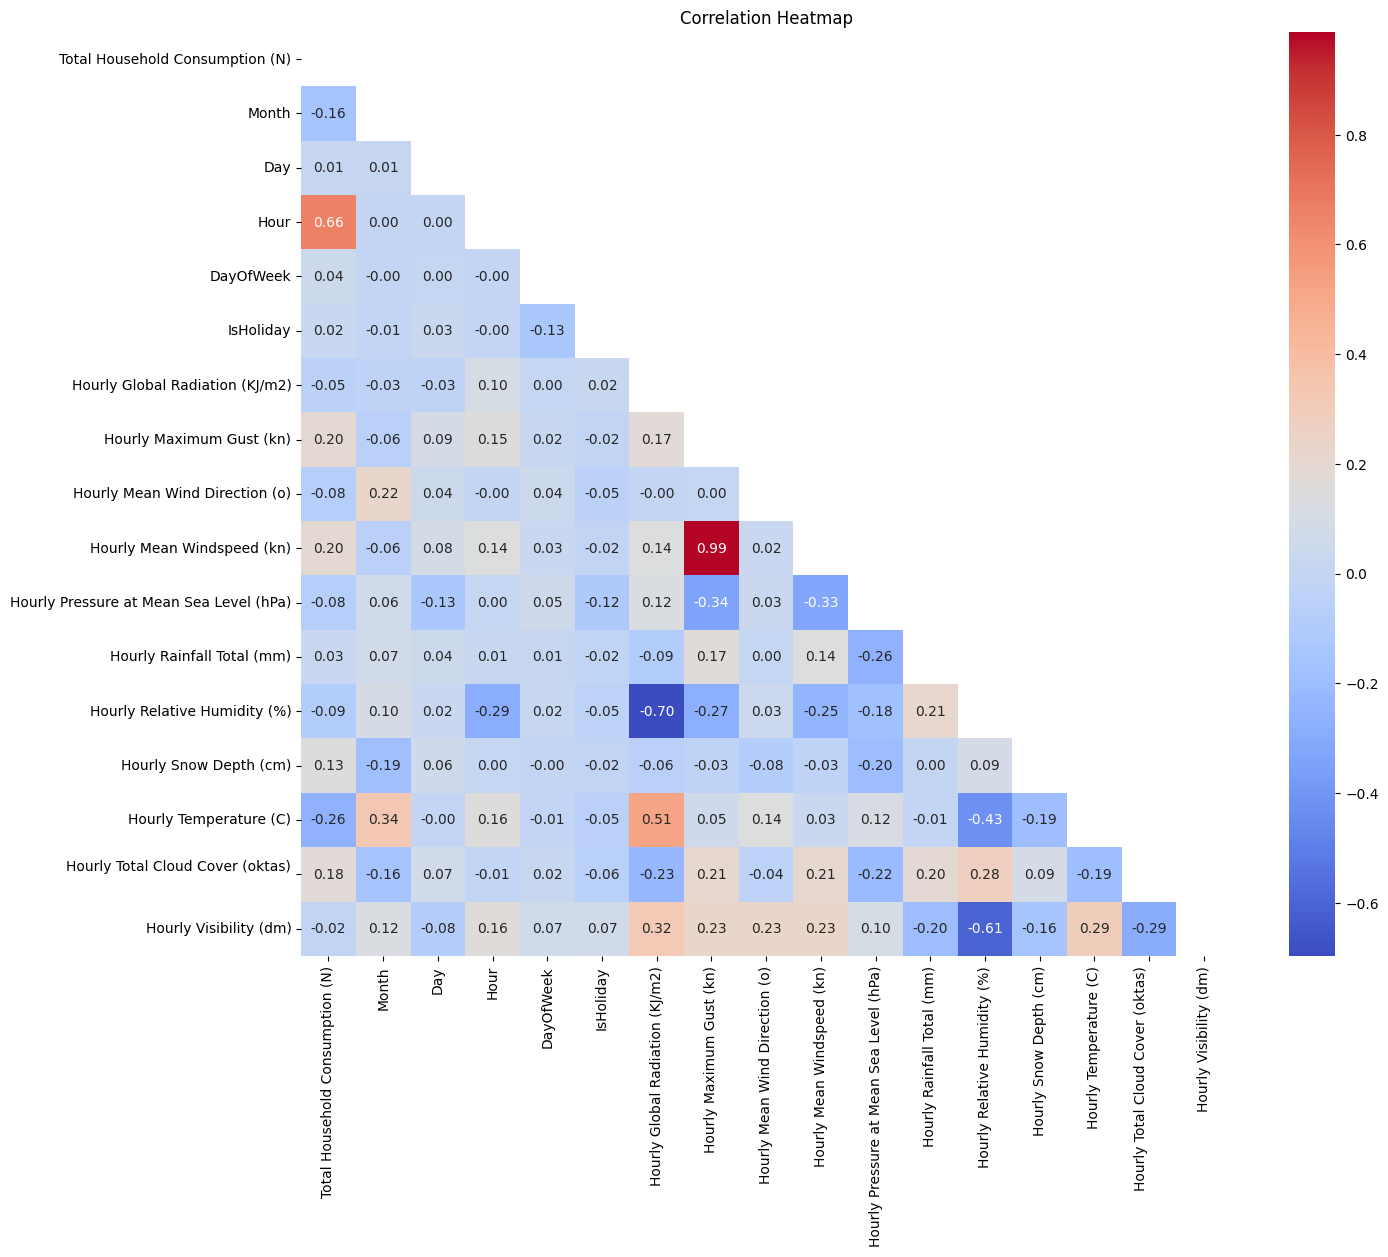

In [ ]:
filtered_merged_n = merged_n.drop(columns=['Year', 'Consumption Per Household'])
corr_n = filtered_merged_n.corr()
mask_n = np.triu(np.ones_like(corr_n, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_n, annot=True, fmt=".2f", cmap='coolwarm', mask=mask_n)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Defining a threshold
threshold = 0.6

for column in corr_n.columns:
    for index in corr_n.index:
        if abs(corr_n.loc[index, column]) > threshold and column != index:
            print(f"Correlation between {index} and {column} is {corr_n.loc[index, column]:.2f}")


Correlation between Hour and Total Household Consumption (N) is 0.66
Correlation between Total Household Consumption (N) and Hour is 0.66
Correlation between Hourly Relative Humidity (%) and Hourly Global Radiation (KJ/m2) is -0.70
Correlation between Hourly Mean Windspeed (kn) and Hourly Maximum Gust (kn) is 0.99
Correlation between Hourly Maximum Gust (kn) and Hourly Mean Windspeed (kn) is 0.99
Correlation between Hourly Global Radiation (KJ/m2) and Hourly Relative Humidity (%) is -0.70
Correlation between Hourly Visibility (dm) and Hourly Relative Humidity (%) is -0.61
Correlation between Hourly Relative Humidity (%) and Hourly Visibility (dm) is -0.61


In [ ]:
# Defining a threshold
threshold = 0.0

for column in corr_n.columns:
    if column != "Total Household Consumption (N)":
        correlation = corr_n.loc["Total Household Consumption (N)", column]
        if abs(correlation) > threshold:
            print(f"Correlation between Total Household Consumption (N) and {column} is {correlation:.2f}")

Correlation between Total Household Consumption (N) and Month is -0.16
Correlation between Total Household Consumption (N) and Day is 0.01
Correlation between Total Household Consumption (N) and Hour is 0.66
Correlation between Total Household Consumption (N) and DayOfWeek is 0.04
Correlation between Total Household Consumption (N) and IsHoliday is 0.02
Correlation between Total Household Consumption (N) and Hourly Global Radiation (KJ/m2) is -0.05
Correlation between Total Household Consumption (N) and Hourly Maximum Gust (kn) is 0.20
Correlation between Total Household Consumption (N) and Hourly Mean Wind Direction (o) is -0.08
Correlation between Total Household Consumption (N) and Hourly Mean Windspeed (kn) is 0.20
Correlation between Total Household Consumption (N) and Hourly Pressure at Mean Sea Level (hPa) is -0.08
Correlation between Total Household Consumption (N) and Hourly Rainfall Total (mm) is 0.03
Correlation between Total Household Consumption (N) and Hourly Relative Hum

Weather Variables Vs. Consumption

Temperature

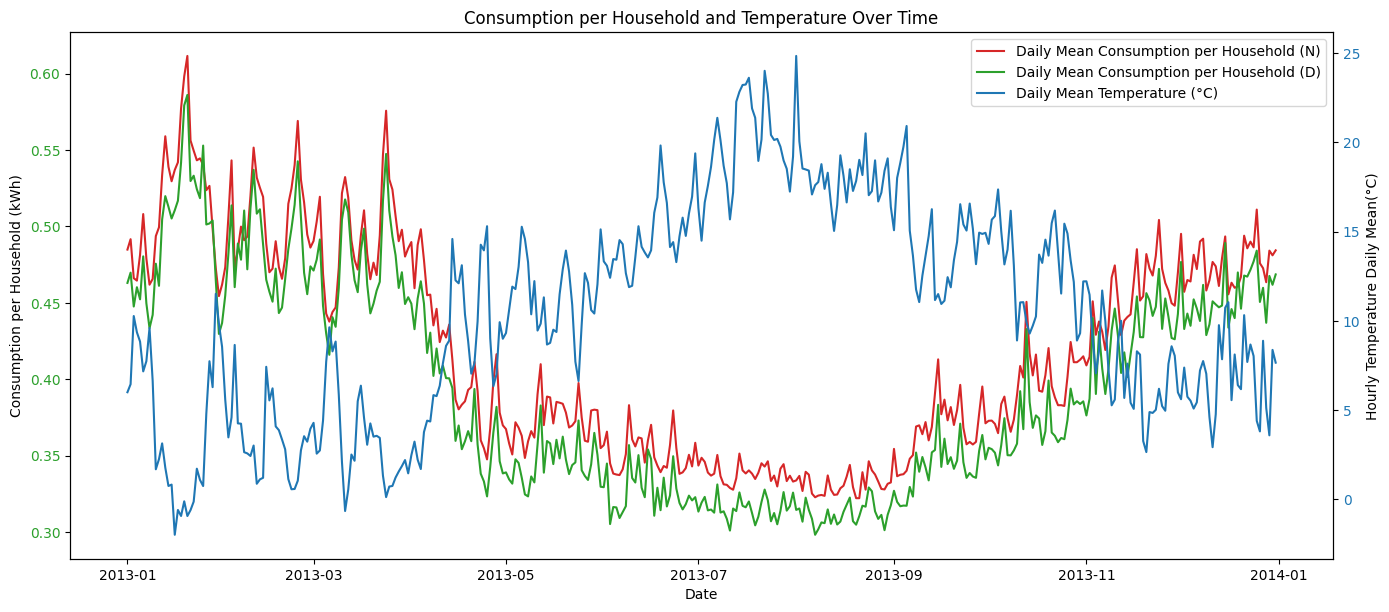

In [ ]:
daily_avg_n_temp = merged_n['Hourly Temperature (C)'].resample('D').mean()
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Consumption per Household (kWh)')
ln1 = ax1.plot(daily_avg_n.index, daily_avg_n, label='Daily Mean Consumption per Household (N)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ln2 = ax1.plot(daily_avg_d.index, daily_avg_d, label='Daily Mean Consumption per Household (D)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Hourly Temperature Daily Mean(°C)')
ln3 = ax2.plot(daily_avg_n_temp.index, daily_avg_n_temp, label='Daily Mean Temperature (°C)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

lns = ln1 + ln2 + ln3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

fig.tight_layout()
plt.title('Consumption per Household and Temperature Over Time')
plt.show()

All Weather Variables vs Consumption

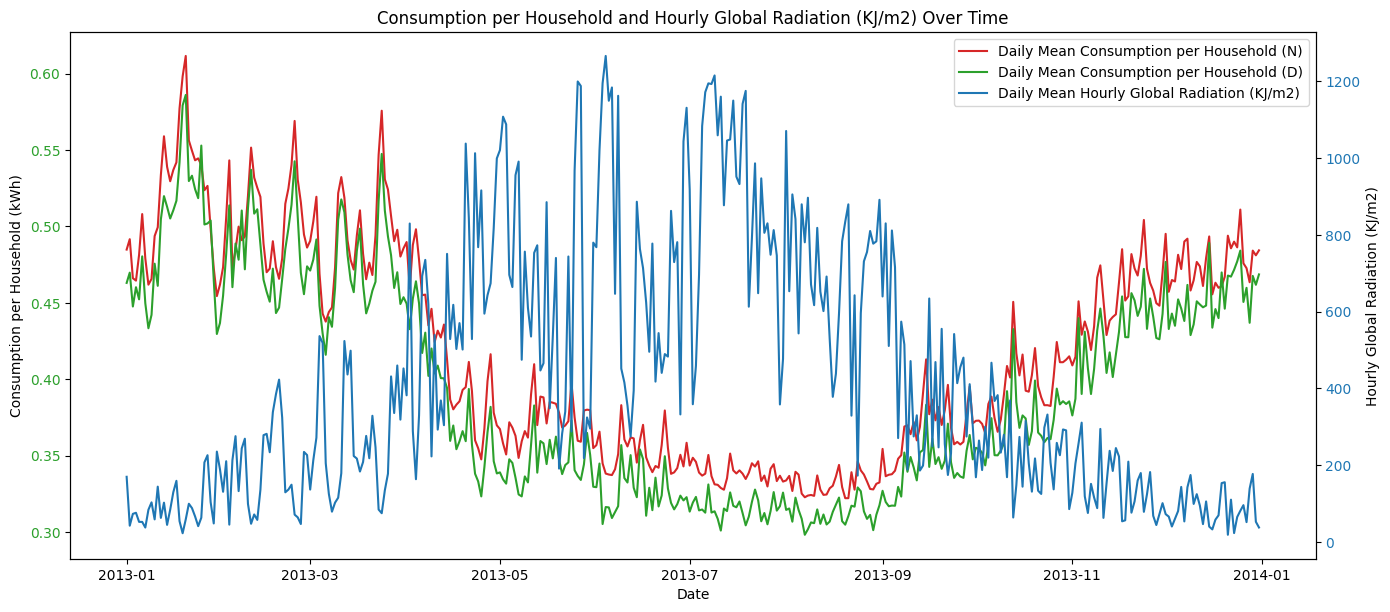

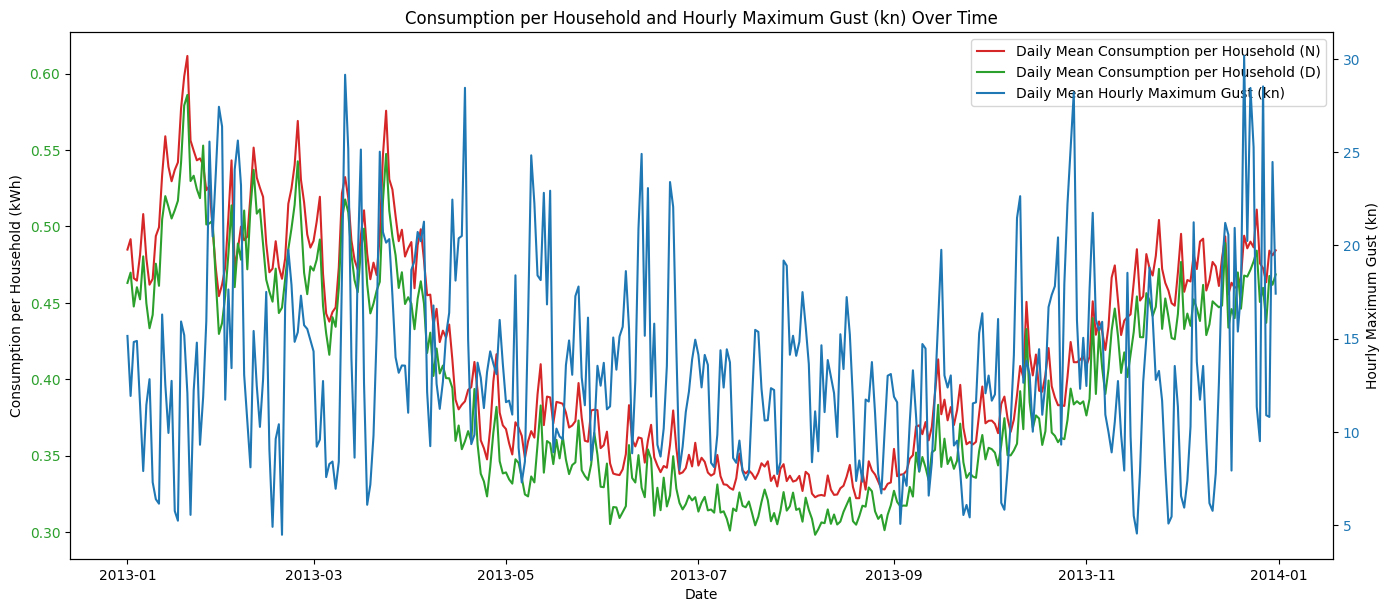

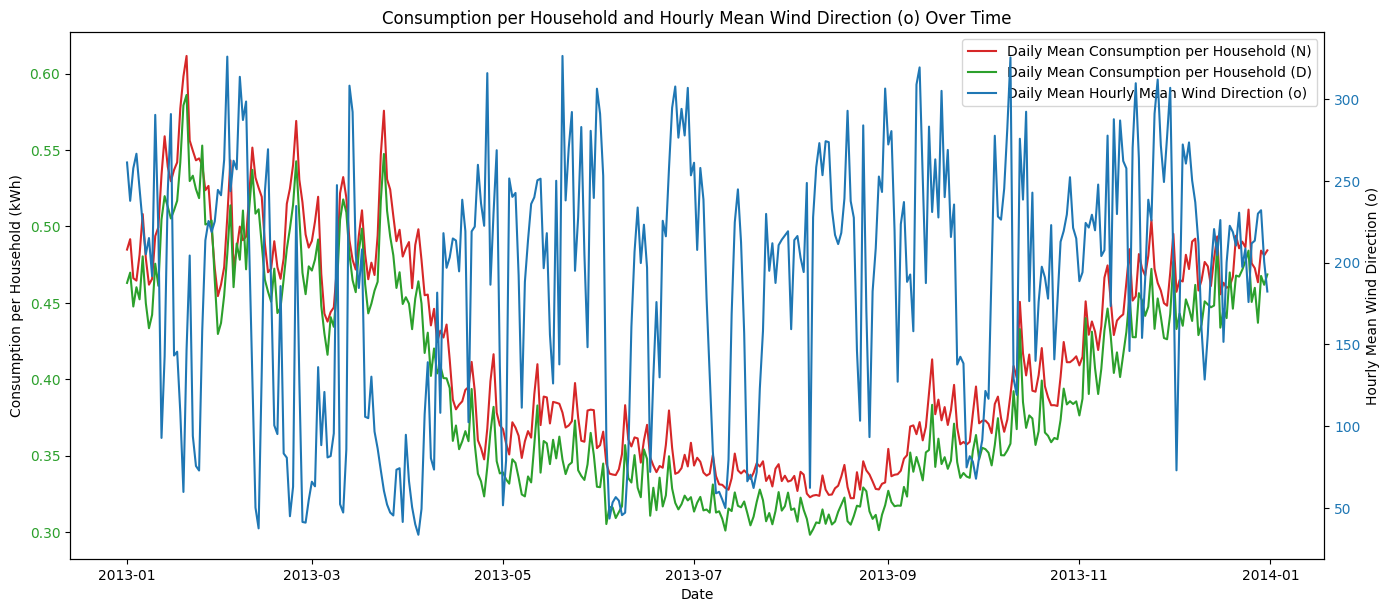

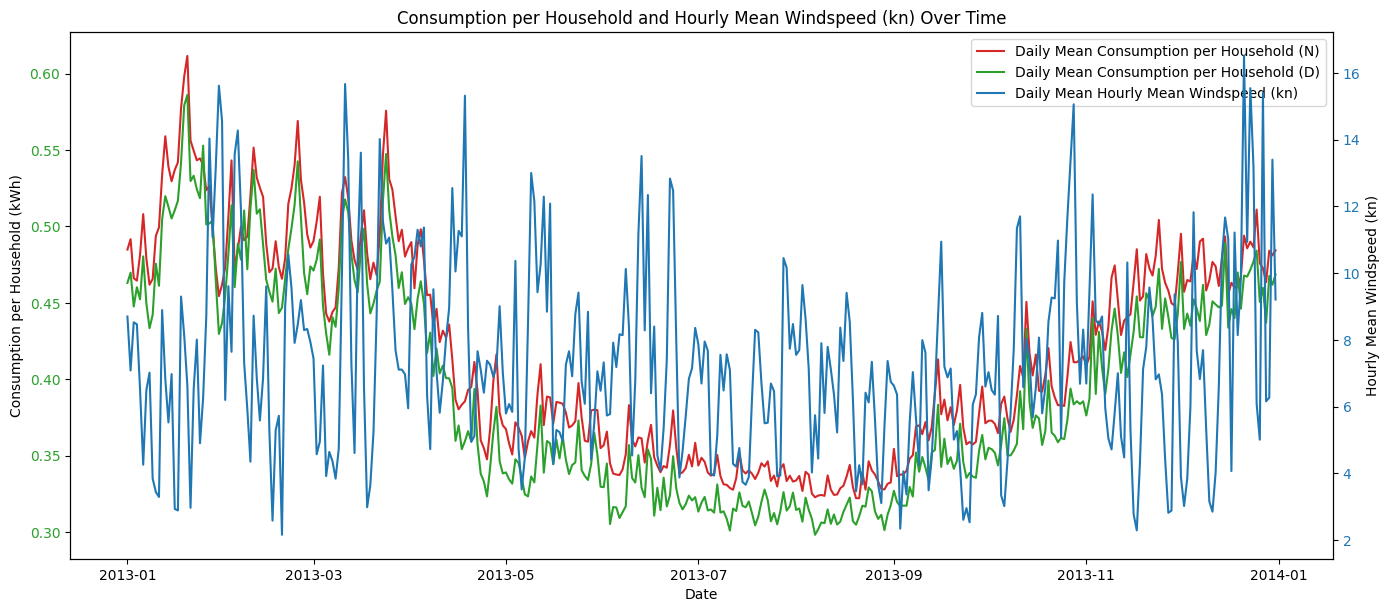

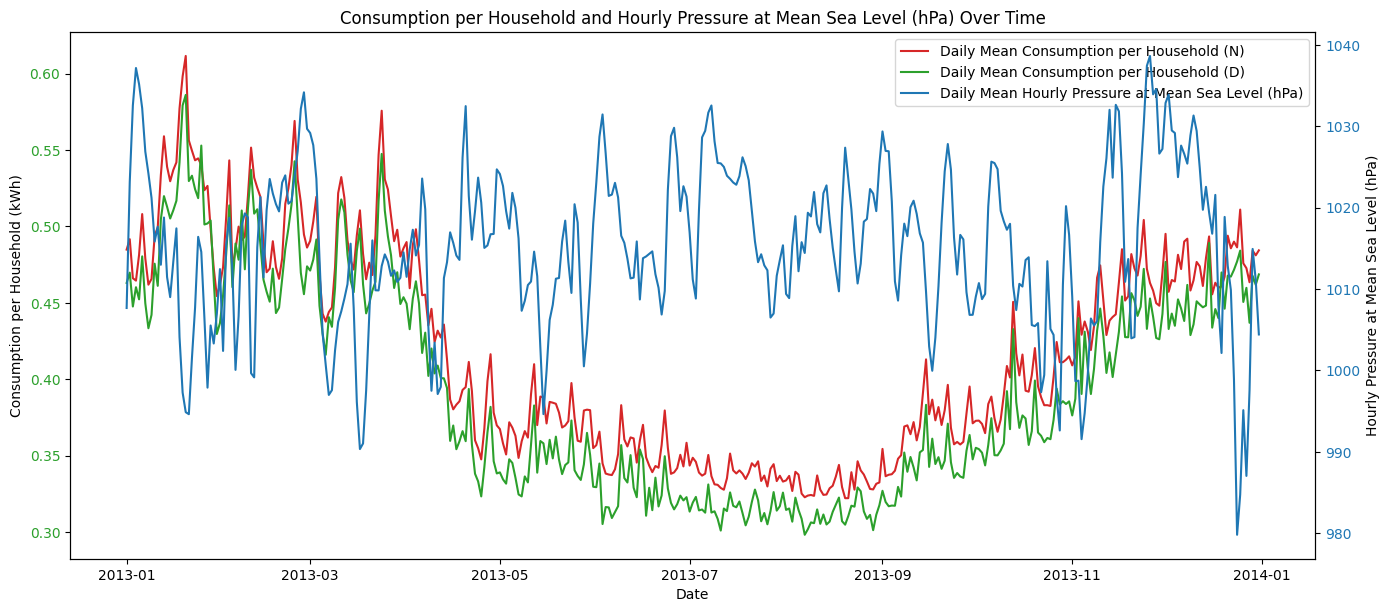

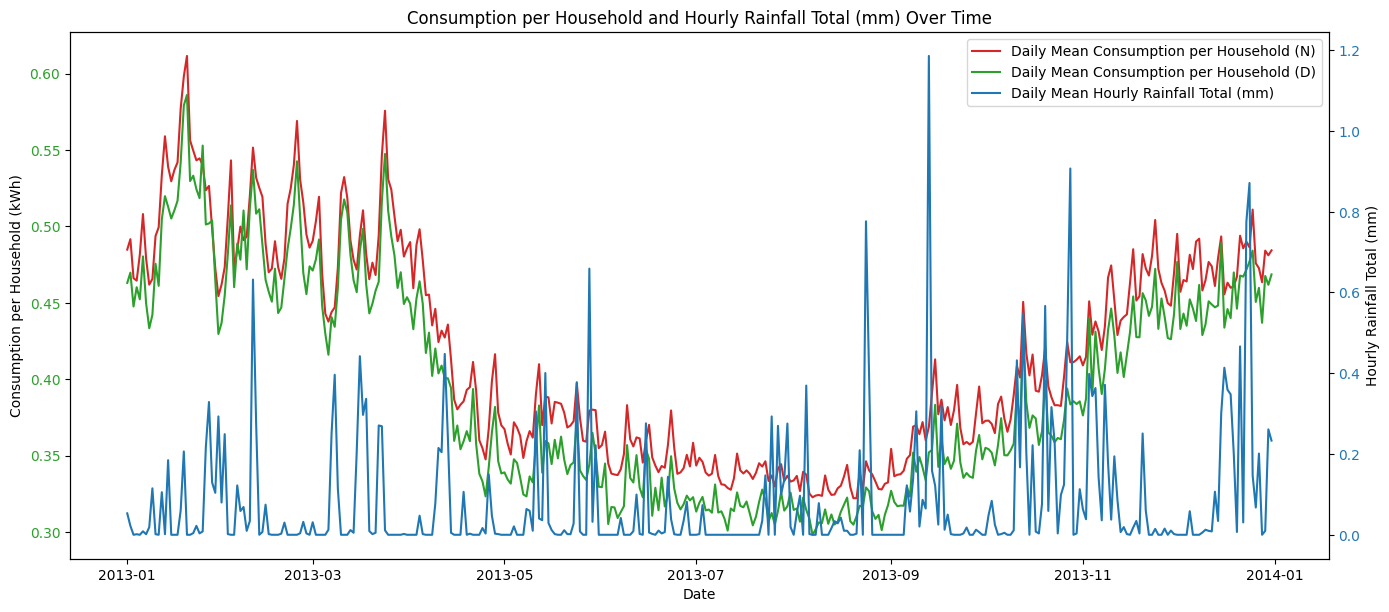

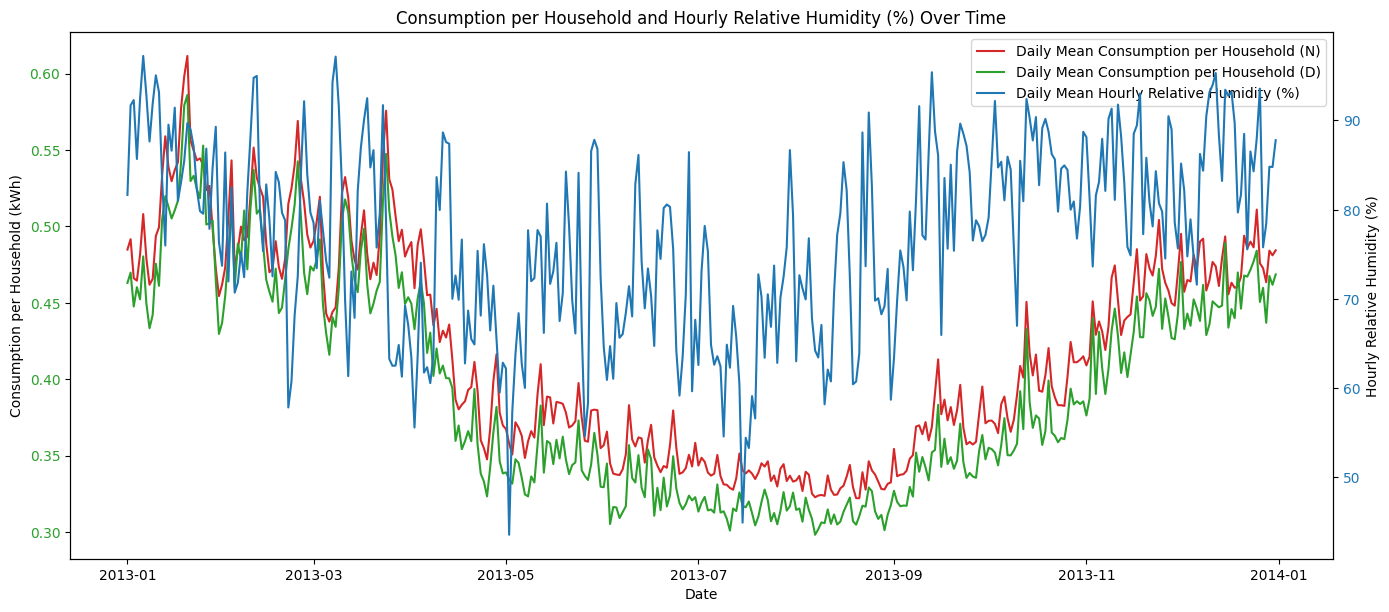

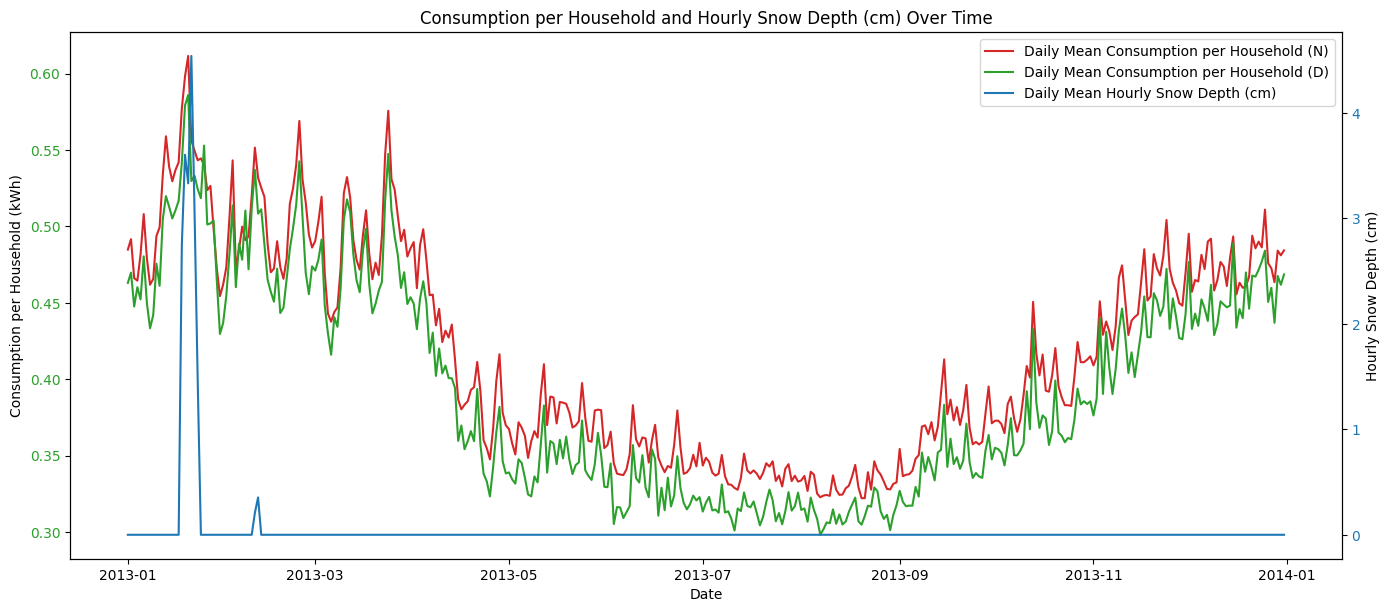

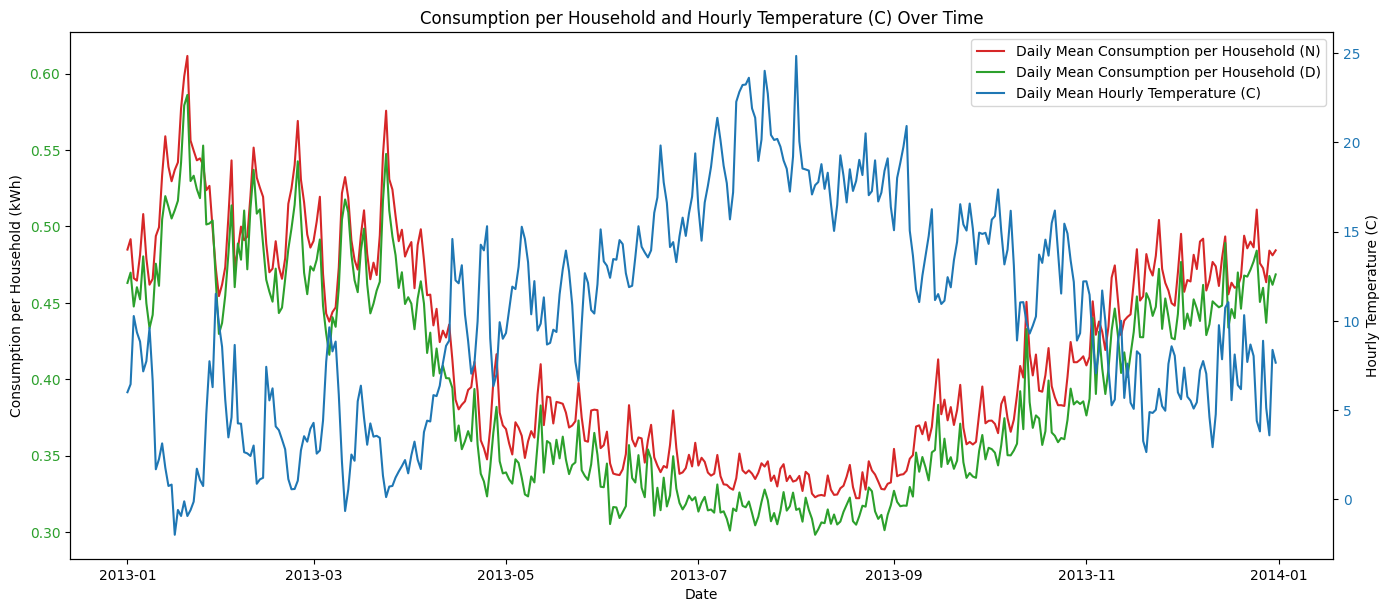

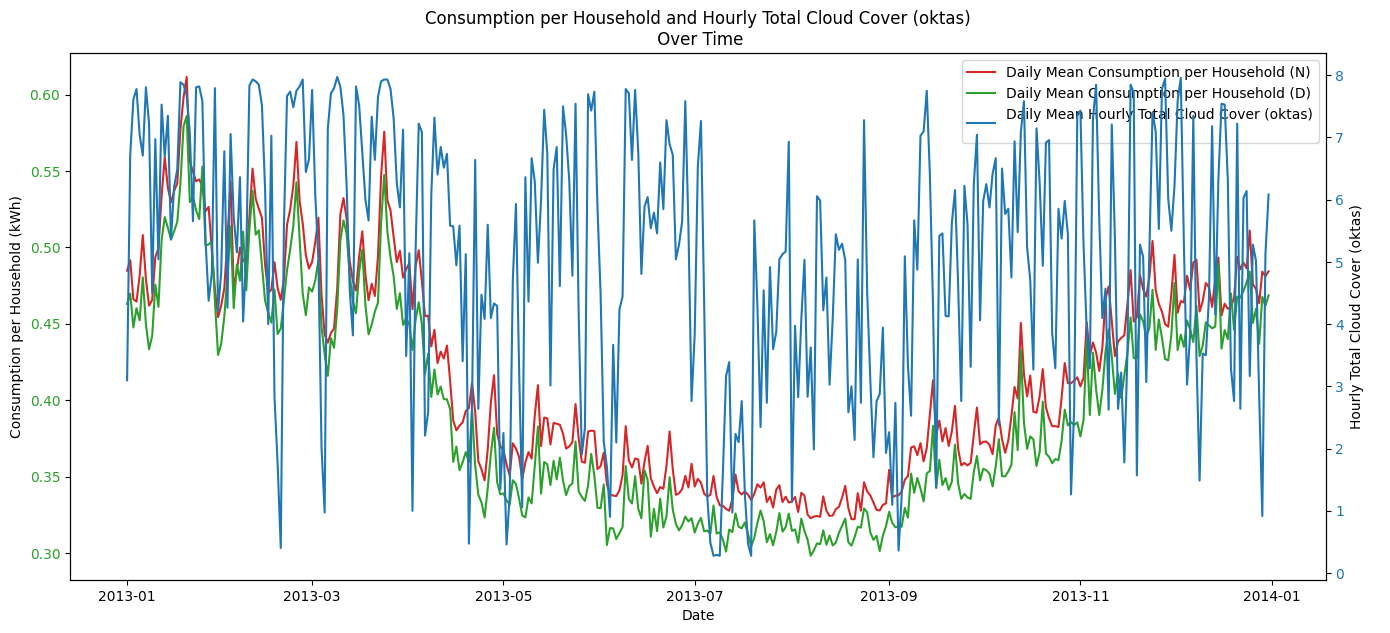

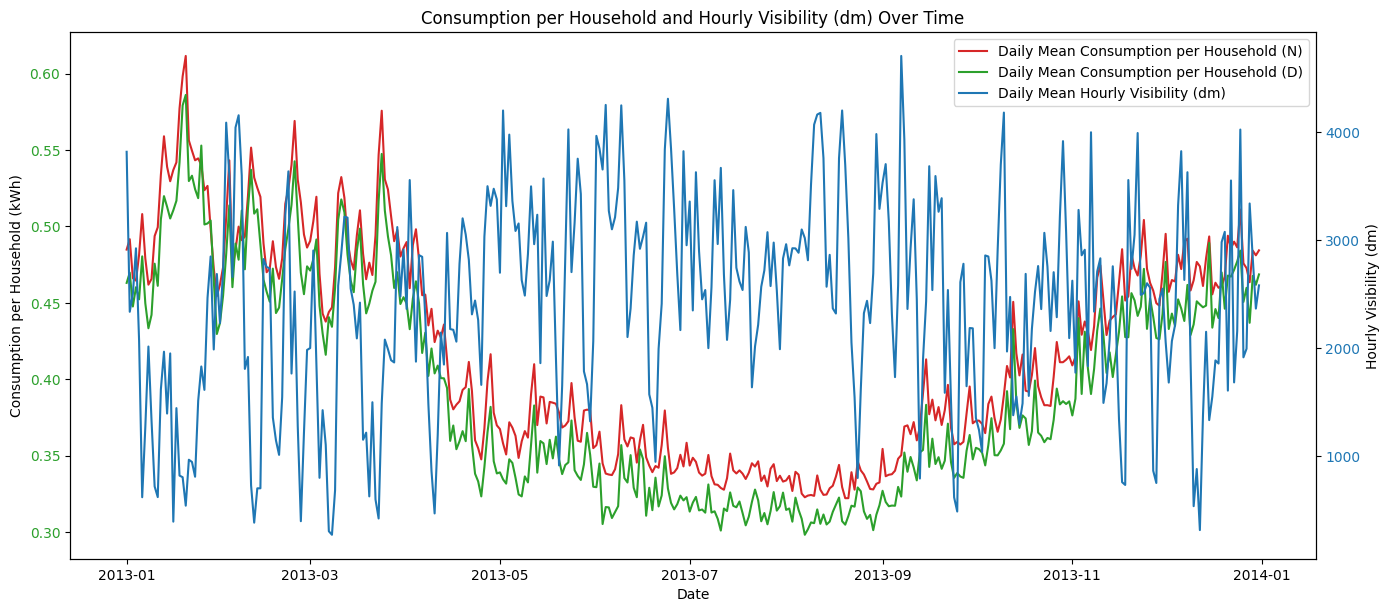

In [ ]:
weather_variables = [
    "Hourly Global Radiation (KJ/m2)",
    "Hourly Maximum Gust (kn)",
    "Hourly Mean Wind Direction (o)",
    "Hourly Mean Windspeed (kn)",
    "Hourly Pressure at Mean Sea Level (hPa)",
    "Hourly Rainfall Total (mm)",
    "Hourly Relative Humidity (%)",
    "Hourly Snow Depth (cm)",
    "Hourly Temperature (C)",
    "Hourly Total Cloud Cover (oktas)\n",
    "Hourly Visibility (dm)"
]

for variable in weather_variables:
    daily_avg_weather = merged_n[variable].resample('D').mean()

    fig, ax1 = plt.subplots(figsize=(14, 6))

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Consumption per Household (kWh)')
    ln1 = ax1.plot(daily_avg_n.index, daily_avg_n, label='Daily Mean Consumption per Household (N)', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    color = 'tab:green'
    ln2 = ax1.plot(daily_avg_d.index, daily_avg_d, label='Daily Mean Consumption per Household (D)', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel(variable)
    ln3 = ax2.plot(daily_avg_weather.index, daily_avg_weather, label=f'Daily Mean {variable}', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    lns = ln1 + ln2 + ln3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=0)

    fig.tight_layout()
    plt.title(f'Consumption per Household and {variable} Over Time')
    plt.show()


Hour vs Consumption

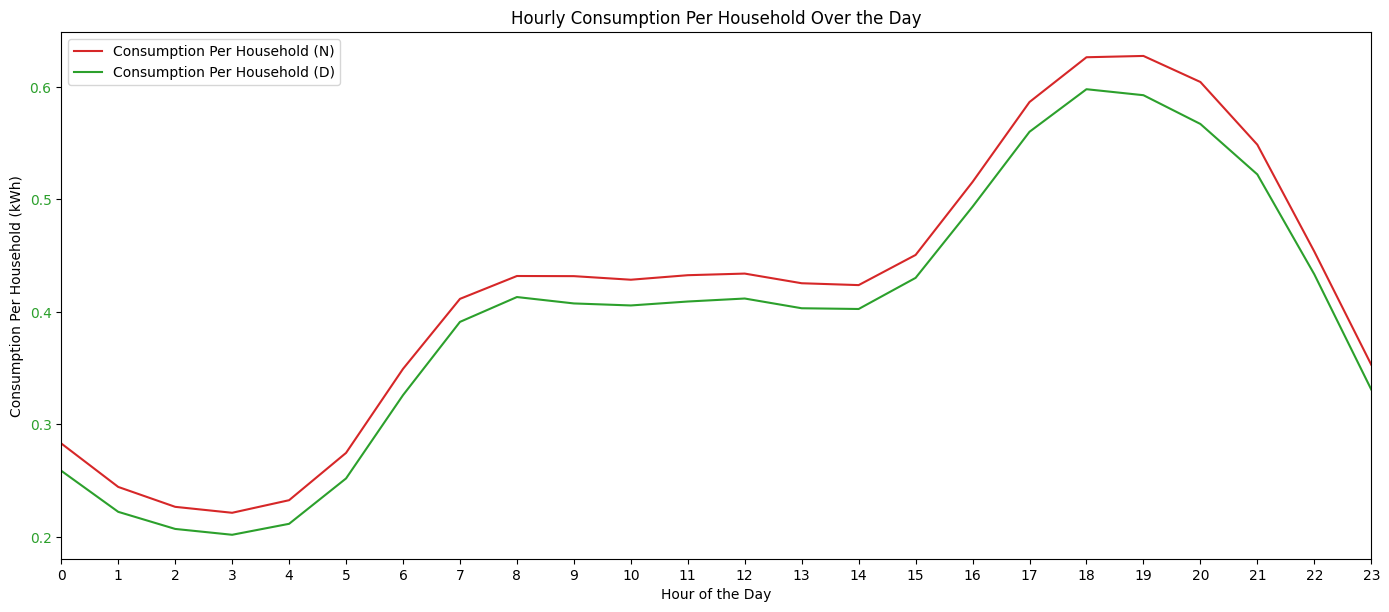

In [ ]:
hourly_avg_n = merged_n.groupby('Hour')['Consumption Per Household'].mean()
hourly_avg_d = merged_d.groupby('Hour')['Consumption Per Household'].mean()
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:red'
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Consumption Per Household (kWh)')
ln1 = ax1.plot(hourly_avg_n.index, hourly_avg_n, label='Consumption Per Household (N)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ln2 = ax1.plot(hourly_avg_d.index, hourly_avg_d, label='Consumption Per Household (D)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_xticks(range(0, 24))
ax1.set_xlim(0, 23)

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

fig.tight_layout()
plt.title('Hourly Consumption Per Household Over the Day')
plt.show()


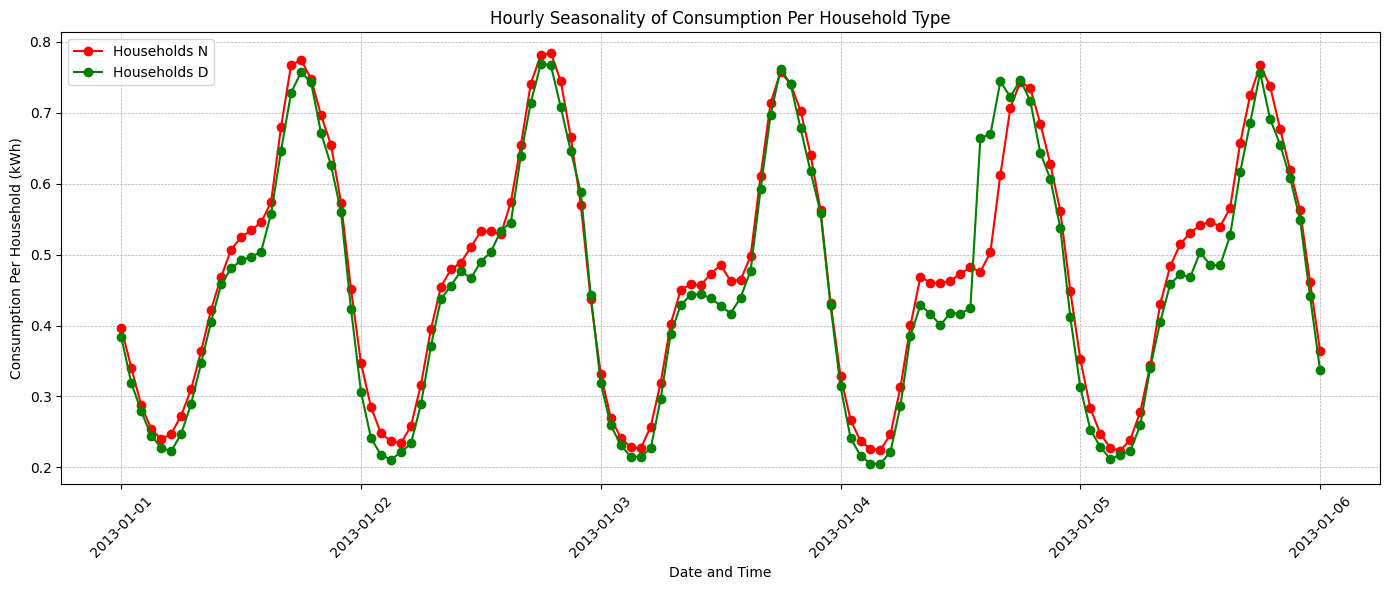

In [ ]:
merged_n = merged_n.sort_index()
merged_d = merged_d.sort_index()

start_date = merged_n.index[0]
end_date = start_date + pd.Timedelta(days=5)
subset_n = merged_n.loc[start_date:end_date, 'Consumption Per Household']
subset_d = merged_d.loc[start_date:end_date, 'Consumption Per Household']


plt.figure(figsize=(14, 6))
plt.plot(subset_n.index, subset_n, label='Households N', color='red', marker='o')
plt.plot(subset_d.index, subset_d, label='Households D', color='green', marker='o')

plt.title('Hourly Seasonality of Consumption Per Household Type')
plt.xlabel('Date and Time')
plt.ylabel('Consumption Per Household (kWh)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Holidays vs Non-Holidays Box Plots

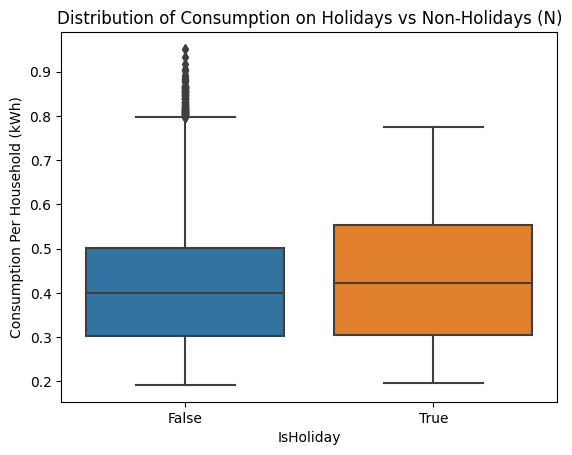

In [ ]:
sns.boxplot(data=merged_n, x='IsHoliday', y='Consumption Per Household')
plt.ylabel('Consumption Per Household (kWh)')
plt.title('Distribution of Consumption on Holidays vs Non-Holidays (N)')
plt.show()

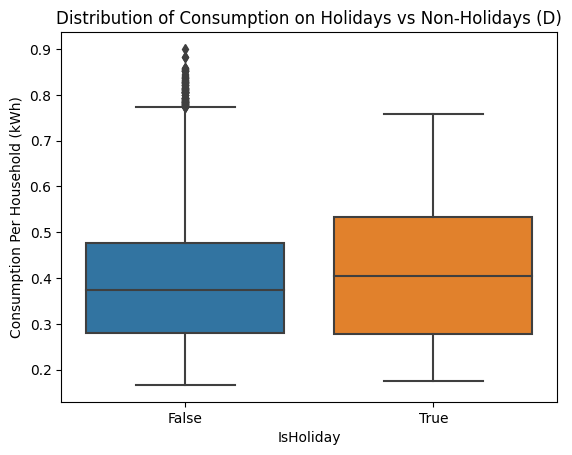

In [ ]:
sns.boxplot(data=merged_d, x='IsHoliday', y='Consumption Per Household')
plt.ylabel('Consumption Per Household (kWh)')
plt.title('Distribution of Consumption on Holidays vs Non-Holidays (D)')
plt.show()

Non-Holidays Ourliers

In [ ]:
non_holidays_n = merged_n[merged_n['IsHoliday'] == False]
Q1_n = non_holidays_n['Consumption Per Household'].quantile(0.25)
Q3_n = non_holidays_n['Consumption Per Household'].quantile(0.75)
IQR_n = Q3_n - Q1_n
outliers_n = non_holidays_n[(non_holidays_n['Consumption Per Household'] < (Q1_n - 1.5 * IQR_n)) |
                        (non_holidays_n['Consumption Per Household'] > (Q3_n + 1.5 * IQR_n))]
print(outliers_n)

                     Total Household Consumption (N)       Date      Time  \
GMT                                                                         
2013-01-06 18:00:00                      3355.898550 2013-01-06  18:00:00   
2013-01-10 18:00:00                      3403.074362 2013-01-10  18:00:00   
2013-01-10 19:00:00                      3405.046836 2013-01-10  19:00:00   
2013-01-11 18:00:00                      3348.914837 2013-01-11  18:00:00   
2013-01-12 17:00:00                      3335.753742 2013-01-12  17:00:00   
...                                              ...        ...       ...   
2013-03-25 18:00:00                      3430.852543 2013-03-25  18:00:00   
2013-03-25 19:00:00                      3507.123070 2013-03-25  19:00:00   
2013-03-26 19:00:00                      3422.807535 2013-03-26  19:00:00   
2013-03-26 20:00:00                      3331.895621 2013-03-26  20:00:00   
2013-03-27 19:00:00                      3395.571045 2013-03-27  19:00:00   

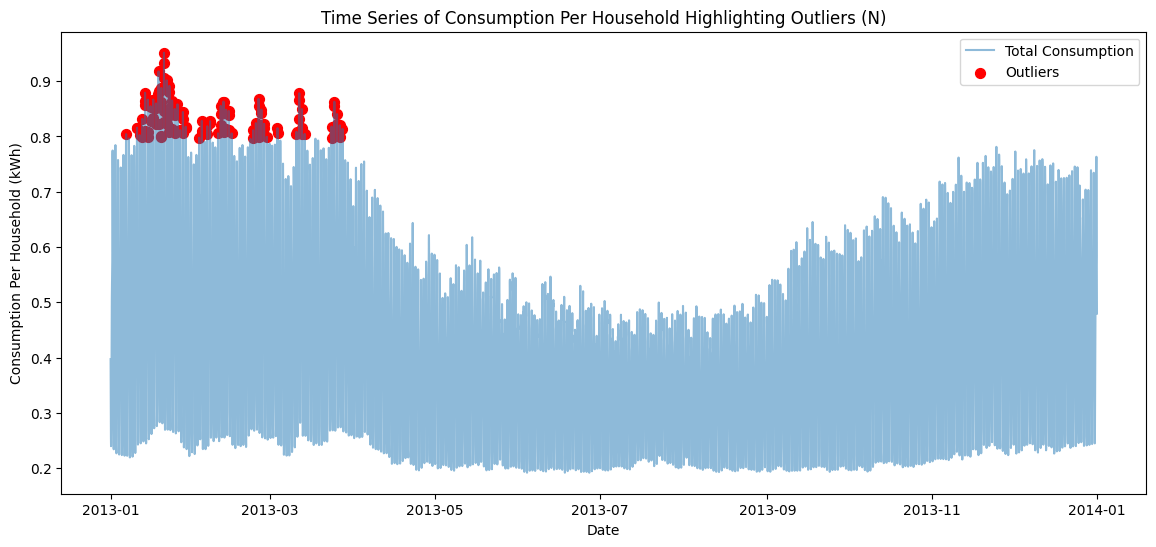

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(merged_n.index, merged_n['Consumption Per Household'], label='Total Consumption', alpha=0.5)
plt.scatter(outliers_n.index, outliers_n['Consumption Per Household'], color='red', label='Outliers', s=50)
plt.title('Time Series of Consumption Per Household Highlighting Outliers (N)')
plt.xlabel('Date')
plt.ylabel('Consumption Per Household (kWh)')
plt.legend()
plt.show()

In [ ]:
non_holidays_d = merged_d[merged_d['IsHoliday'] == False]
Q1_d = non_holidays_d['Consumption Per Household'].quantile(0.25)
Q3_d = non_holidays_d['Consumption Per Household'].quantile(0.75)
IQR_d = Q3_d - Q1_d
outliers_d = non_holidays_d[(non_holidays_d['Consumption Per Household'] < (Q1_d - 1.5 * IQR_d)) |
                        (non_holidays_d['Consumption Per Household'] > (Q3_d + 1.5 * IQR_d))]
print(outliers_d)

                     Total Household Consumption (D)       Date      Time  \
GMT                                                                         
2013-01-06 17:00:00                       795.308000 2013-01-06  17:00:00   
2013-01-06 18:00:00                       803.541000 2013-01-06  18:00:00   
2013-01-10 18:00:00                       826.561000 2013-01-10  18:00:00   
2013-01-10 19:00:00                       794.527000 2013-01-10  19:00:00   
2013-01-11 18:00:00                       799.710000 2013-01-11  18:00:00   
...                                              ...        ...       ...   
2013-03-26 19:00:00                       826.495000 2013-03-26  19:00:00   
2013-11-21 18:00:00                       825.873365 2013-11-21  18:00:00   
2013-12-01 17:00:00                       834.625889 2013-12-01  17:00:00   
2013-12-01 18:00:00                       847.751802 2013-12-01  18:00:00   
2013-12-01 19:00:00                       801.858029 2013-12-01  19:00:00   

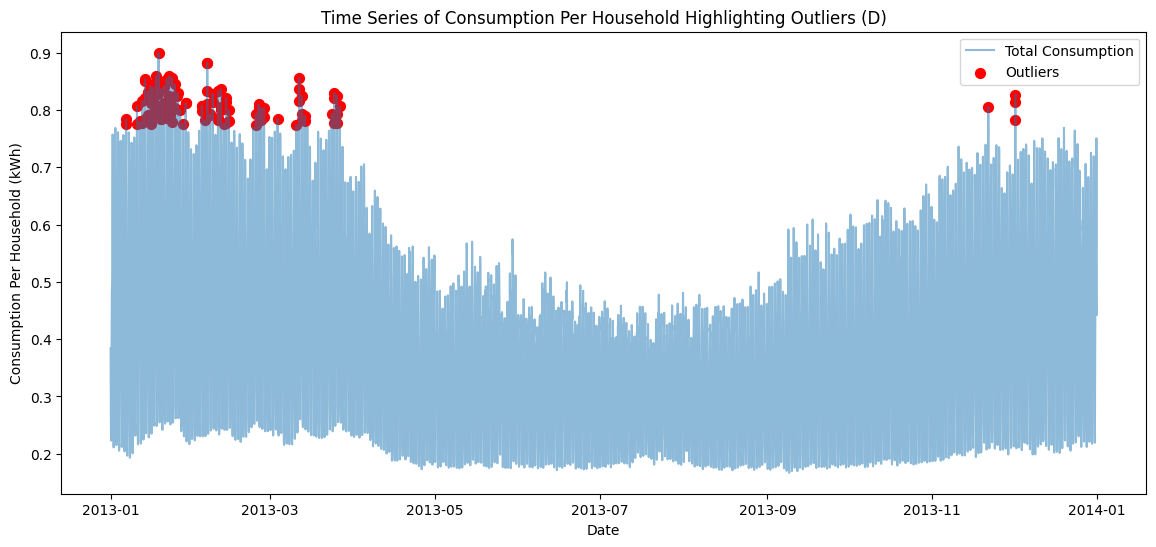

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(merged_d.index, merged_d['Consumption Per Household'], label='Total Consumption', alpha=0.5)
plt.scatter(outliers_d.index, outliers_d['Consumption Per Household'], color='red', label='Outliers', s=50)
plt.title('Time Series of Consumption Per Household Highlighting Outliers (D)')
plt.xlabel('Date')
plt.ylabel('Consumption Per Household (kWh)')
plt.legend()
plt.show()

In [ ]:
#Average temperature during these outlier times for households N
print(outliers_n['Hourly Temperature (C)'].mean())

1.7785919540229884


In [ ]:
non_holidays_avg_temp_ = merged_n[merged_n['IsHoliday'] == False]['Hourly Temperature (C)'].mean()
print(non_holidays_avg_temp_)

10.471716686674668


In [ ]:
#Average temperature during these outlier times for households D
print(outliers_d['Hourly Temperature (C)'].mean())

1.9752763605442176
